In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95))]
d2['ratek'] = d2['rate']/1000.0
scatterm = {
    40.0: '^',
    80.0: 'o',
    120.0: 'v',
    150.0: '*'
}


In [19]:
d2[['nwindows', 'SourcenumRecordsOutPerSecond_avg', 'rate', 'ratek', 'pkg_watts_avg']]

,nwindows,SourcenumRecordsOutPerSecond_avg,rate,ratek,pkg_watts_avg
0,4,40000.000000,40000,40.0,33.82
1,8,40000.000000,40000,40.0,28.84
2,12,39986.592157,40000,40.0,28.51
3,16,40000.000000,40000,40.0,27.45
4,4,79938.918627,80000,80.0,43.23
5,8,79931.356863,80000,80.0,39.97
6,12,80000.000000,80000,80.0,37.01
7,16,79981.801961,80000,80.0,36.73
8,4,119960.978431,120000,120.0,57.10
9,8,119944.676471,120000,120.0,48.39


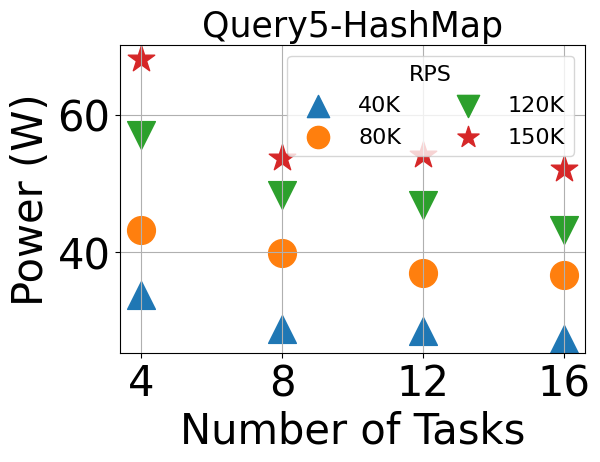

In [20]:
plt.rcParams['figure.figsize'] = 6,4
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

#plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis', s=400)
for rk in d2['ratek'].unique().tolist():
    d3 = d2[d2.ratek==rk]
    plt.scatter(d3['nwindows'], d3['pkg_watts_avg'], s=400, marker=scatterm[rk], label=f"{int(rk)}K")
    
#plt.colorbar(label='Rate (K)')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Tasks')
plt.ylabel('Power (W)')
plt.title('Query5-HashMap', size=25)
plt.legend(loc='upper right', markerscale=0.8, fontsize=16, title="RPS", title_fontsize=16, ncol=2)
#plt.ylim(bottom=0)
#plt.xlim(left=0)
plt.grid()
plt.savefig("query5diffmappershashmapwindowlength60.pdf", bbox_inches='tight')